## Predicting GDP Using ARIMA Model 



## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
data = pd.read_csv("RealGDP.csv")

In [3]:
# Making a copy of the data. Hence keeping the original dataframe aside.

df = data.copy()

In [4]:
df.head()

,tyear,Period,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,MiningAndQuarrying,CrudePetroleumAndNaturalGas,...,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices,TOTAL_GDP,TotalGDPatConstantBasicPrices,NonOilGDPatConstantBasicPrices,NetIndirectTaxesOnProducts,TotalGDPatConstantMarketPrices
0,1981,Annual,2364373.15,1854764.44,341411.50,77897.99,90299.23,6603250.12,NaN,4977416.70,...,3234.81,807075.54,242555.85,110697.65,132700.20,15258004.34,NaN,NaN,NaN,NaN
1,1982,Annual,2425960.89,1897078.85,361115.70,73910.25,93856.08,6272828.03,NaN,4453093.63,...,3252.38,825921.69,248219.81,113282.57,133767.58,14985078.32,NaN,NaN,NaN,NaN
2,1983,Annual,2409081.92,1842704.31,393131.01,75282.78,97963.82,5264881.39,NaN,4052977.68,...,3693.79,844767.84,253883.77,115867.49,125819.69,13849725.17,NaN,NaN,NaN,NaN
3,1984,Annual,2303505.42,1759115.15,399685.38,76694.14,68010.74,5621181.44,NaN,4559196.21,...,3979.28,863613.99,259547.73,118452.41,103092.67,13779255.49,NaN,NaN,NaN,NaN
4,1985,Annual,2731062.47,2180907.71,428102.85,78082.45,43969.46,6379599.38,NaN,4918272.50,...,4624.92,882460.14,265211.69,121037.33,98790.30,14953913.05,NaN,NaN,NaN,NaN


In [5]:
#droping the irrelevant columns 
df.drop(df.columns.difference(['tyear','TOTAL_GDP']), 1, inplace=True)
df.head()

C:\Users\ezias\AppData\Local\Temp\ipykernel_14840\749083740.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['tyear','TOTAL_GDP']), 1, inplace=True)


,tyear,TOTAL_GDP
0,1981,15258004.34
1,1982,14985078.32
2,1983,13849725.17
3,1984,13779255.49
4,1985,14953913.05


In [6]:
df.set_index('tyear', inplace=True)

In [7]:
df.head()

,TOTAL_GDP
tyear,
1981,15258004.34
1982,14985078.32
1983,13849725.17
1984,13779255.49
1985,14953913.05


C:\Users\ezias\AppData\Local\Temp\ipykernel_14840\450646963.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


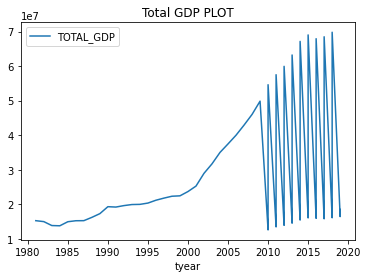

In [8]:
#A plot of the Total GDP against the corresponding years
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 

df.plot()
pyplot.title('Total GDP PLOT')
pyplot.show()

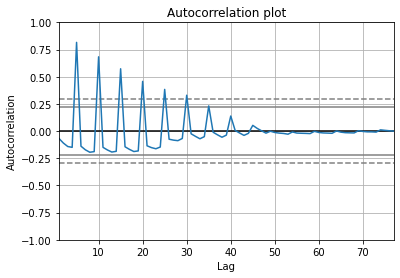

In [9]:
#Autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)
pyplot.title('Autocorrelation plot')
pyplot.show()

In [10]:
from statsmodels.tsa.arima.model import ARIMA

In [11]:
from pandas import DataFrame

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:              TOTAL_GDP   No. Observations:                   77
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1298.805
Date:                Tue, 09 Aug 2022   AIC                           2609.610
Time:                        22:46:22   BIC                           2623.595
Sample:                             0   HQIC                          2615.199
                                 - 77                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3193      0.068     -4.683      0.000      -0.453      -0.186
ar.L2         -0.3102      0.087     -3.573      0.000      -0.480      -0.140
ar.L3         -0.3179      0.069     -4.626      0.0

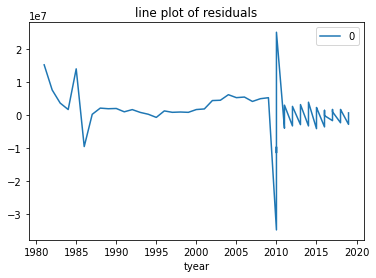

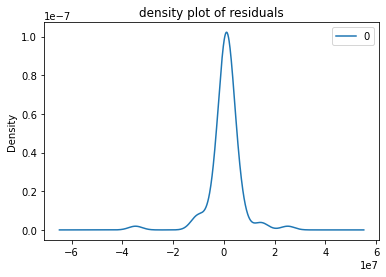

                  0
count  7.700000e+01
mean   7.118651e+05
std    6.414831e+06
min   -3.484775e+07
25%   -1.899653e+05
50%    8.449681e+05
75%    2.008476e+06
max    2.514734e+07


In [12]:
# fit model
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.title('line plot of residuals')
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.title('density plot of residuals')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [13]:
from math import sqrt
from sklearn.metrics import mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=16914122.128200, expected=17555441.690000
predicted=15876428.623643, expected=18213537.290000
predicted=67943615.984196, expected=67931235.930000
predicted=18520996.185356, expected=15797965.830000
predicted=16708371.839244, expected=16334719.270000
predicted=16885310.400949, expected=17760228.170000
predicted=16397659.182683, expected=18598067.070000
predicted=67311021.591041, expected=68490980.340000
predicted=19017309.175905, expected=16096654.190000
predicted=17057880.721312, expected=16580508.070000
predicted=17279562.399117, expected=18081342.100000
predicted=17131446.674095, expected=19041437.590000
predicted=67974843.282023, expected=69799941.950000
predicted=19497486.199127, expected=16434552.650000
predicted=17271372.414775, expected=16931434.890000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


predicted=17741182.947303, expected=18494114.170000
Test RMSE: 1711571.762


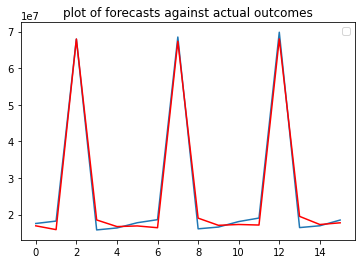

In [14]:
# split into train and test sets
X = df.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.title('plot of forecasts against actual outcomes')
pyplot.legend()
pyplot.show()

In [15]:
from sklearn import metrics
print(metrics.mean_absolute_error(test, predictions))
print(metrics.mean_squared_error(test, predictions))
print(np.sqrt(metrics.mean_squared_error(test, predictions)))

1402092.1769288818
2929477896820.883
1711571.7621008132
